In [1]:
1 + 1

2

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [79]:
from my_tools import *

In [120]:
# Q_MINCOIN
MNC = CoinDataMgr(blocksci_path="/home/ubuntu/mincoin",
                  path_to_clusters="/home/ubuntu/~/clusters2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks",
                  max_block=500000)

Got 500000 blocks
Got 90517 clusters


In [121]:
MNC[S_GINIS].readAll()
MNC[S_REL_FLOWS].readAll()
MNC[S_FEES].readAll()
MNC[S_NCS].readAll()
MNC[S_UNSPENTS].readAll()
MNC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_oldQ.json', key is 'oldQ'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_fees'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


In [130]:
tag_m = MNC.gatherAllMetrics({S_NCS:'', S_GINIS:'', S_REL_FLOWS:'nonPar', S_FEES:'par', S_UNSPENTS:'par'})
tag_filtered_m = MNC.rollingMeanAllMetrics(allMetrics_tag=tag_m, common_win=5)

Gathered under tag 'ginisOfClustersWealth=_unspents=par_relativeFlowVolumes=nonPar_fees=par_NacamotoCoefs='


/home/ubuntu/thesis_work/my_tools.py:344: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


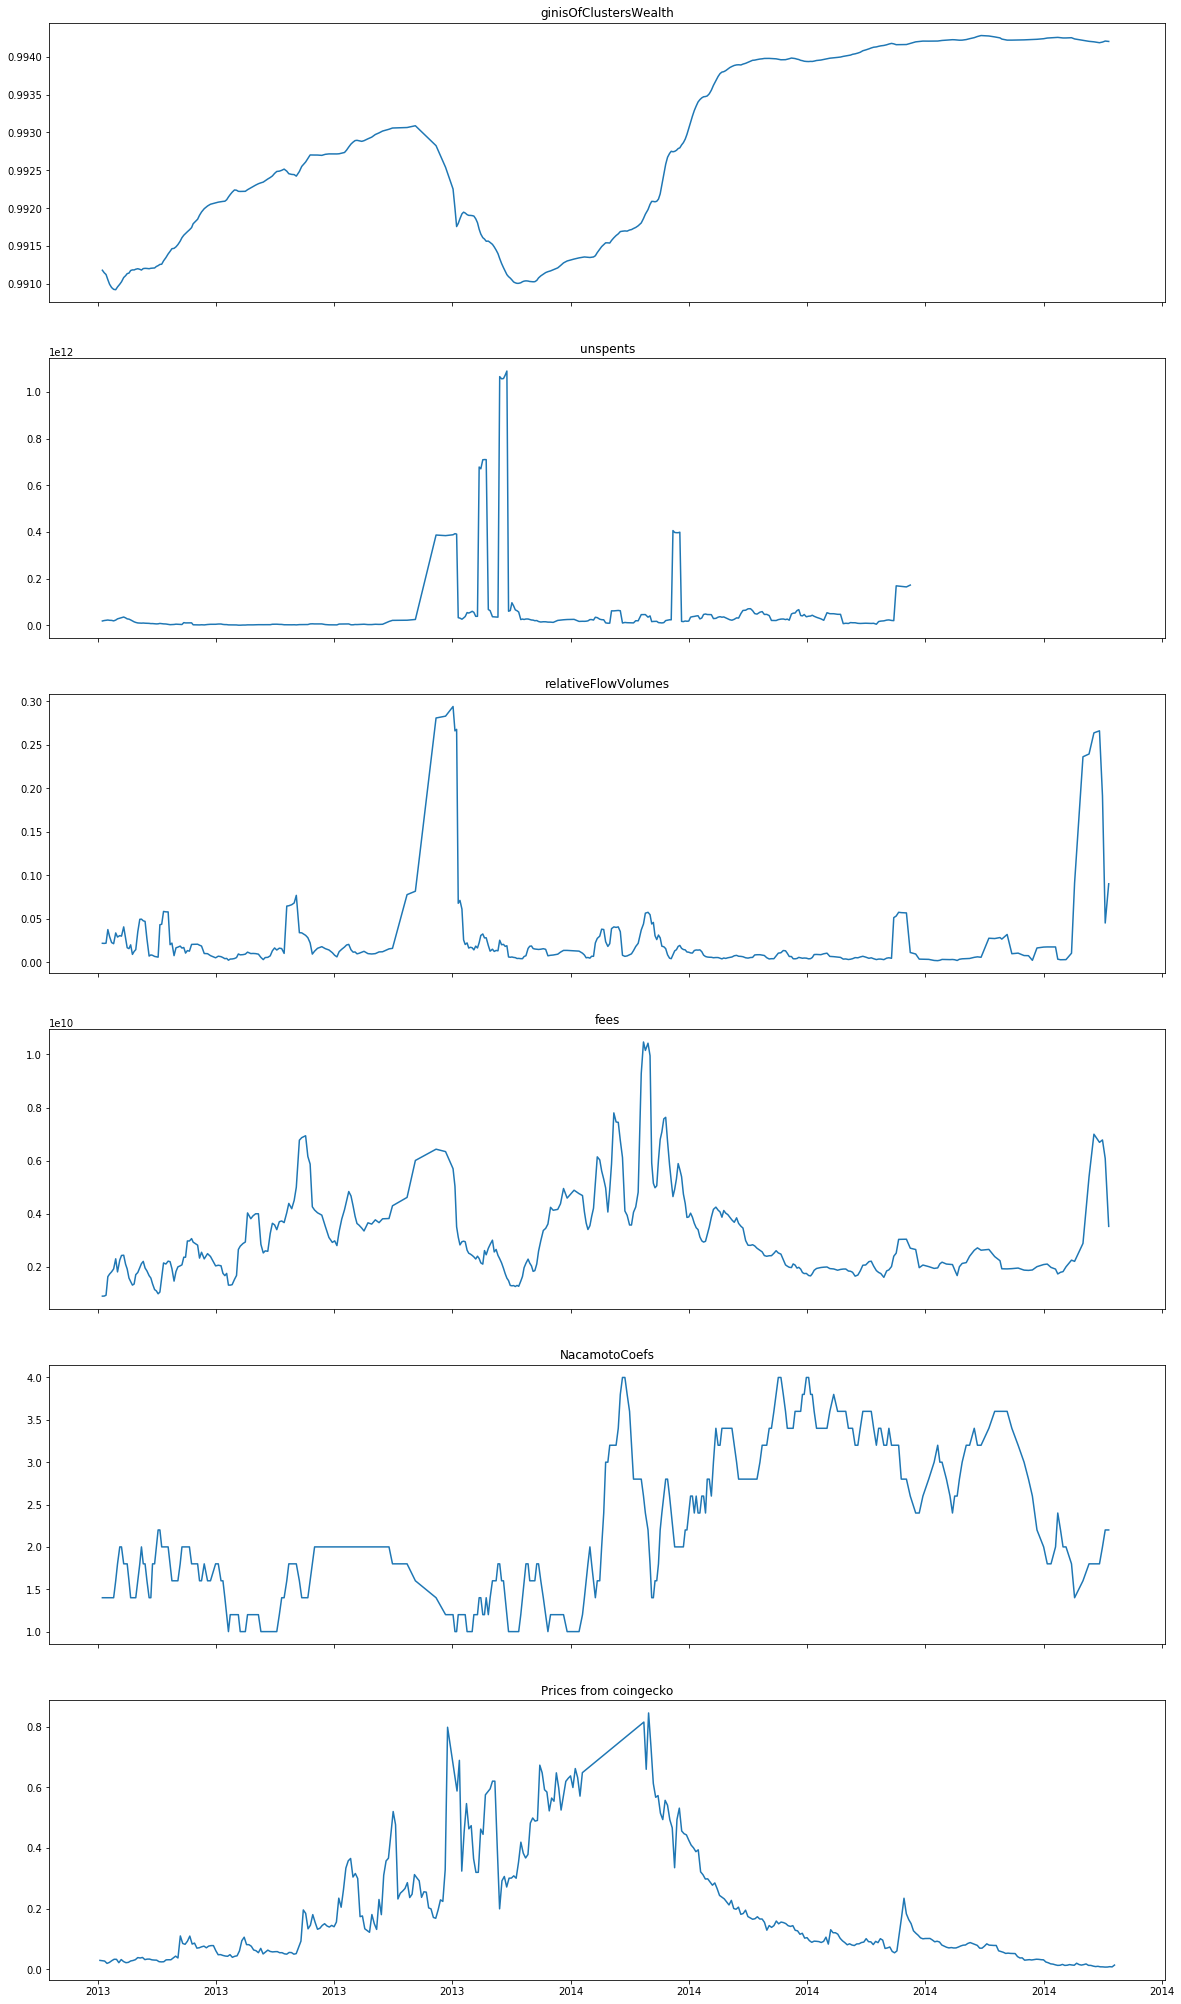

In [153]:
_m = MNC.drawGraph(allMetrics_tag=tag_filtered_m, price_key='coingecko', begin=110)

In [132]:
_m.savefig('mincoin_win5.png')

In [124]:
import pandas as pd
prices_m_df = pd.read_csv('~/thesis_work/downloaded/mnc-usd-max.csv')
prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= MNC.times[-1]]
prices_half_m_df[:3]

,snapped_at,price,market_cap,total_volume
0,2013-05-03 00:00:00 UTC,0.099005,100528.0,0.0
1,2013-05-04 00:00:00 UTC,0.193906,197809.0,0.0
2,2013-05-05 00:00:00 UTC,0.118000,120599.0,0.0


In [125]:
prices_m_df_to_save = pd.DataFrame({'times': prices_half_m_df['snapped_at'],
                                    'prices': prices_half_m_df['price']})
prices_m_df_to_save[-1:]

,prices,times
456,0.014203,2014-09-04 00:00:00 UTC


In [126]:
MNC.prices.add('coingecko', prices_m_df_to_save)

In [128]:
MNC.prices.save('coingecko', check=False)

Saving "coingecko" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks/int1000b_prices_coingecko" file


In [129]:
MNC.getFees()

Work time 0.82s


In [130]:
MNC.getRevenues()

Work time 0.81s


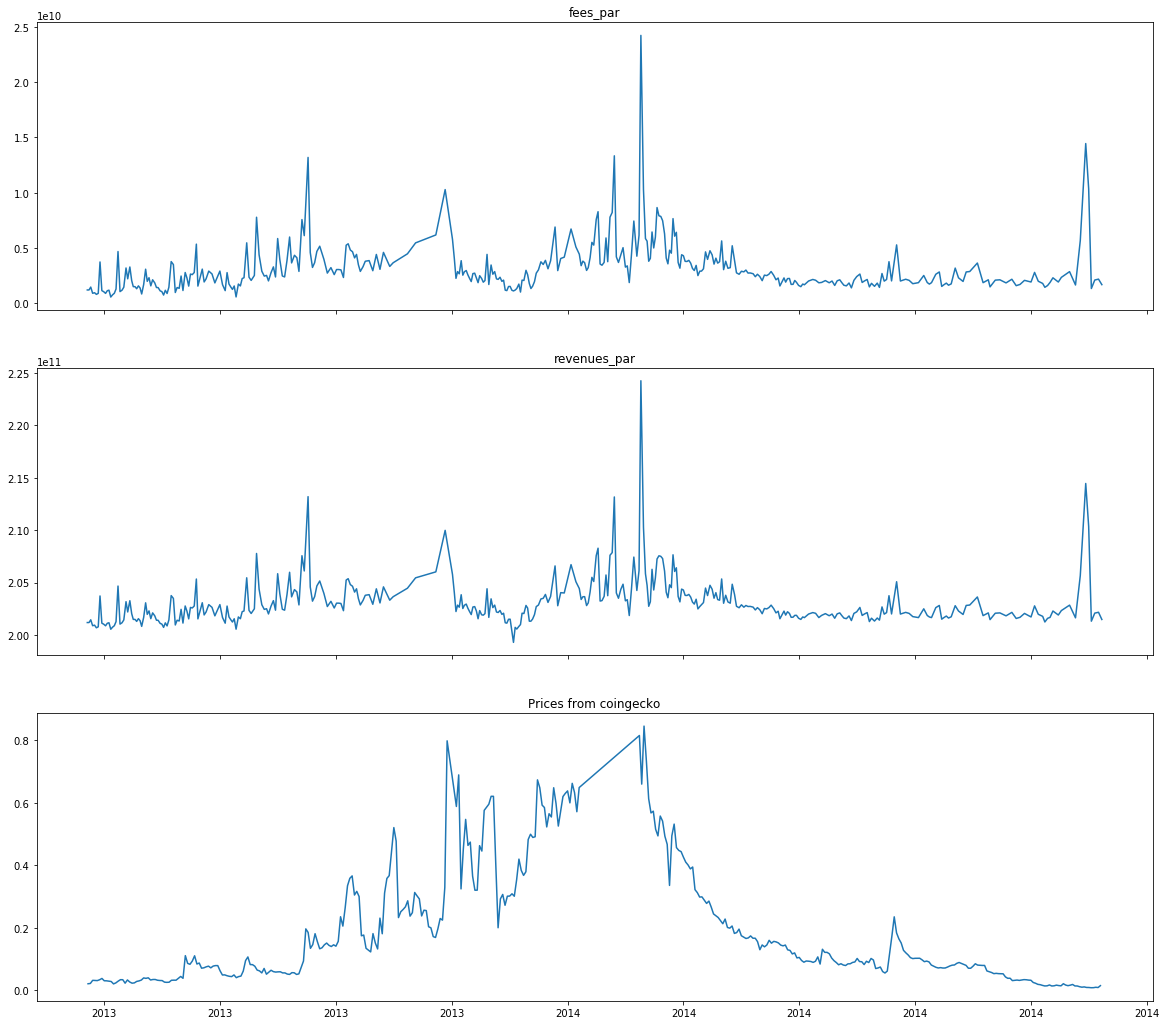

In [132]:
_ = MNC.drawGraph({S_REVENUES:'par', S_FEES:'par'}, begin=100, price_key='coingecko')

In [30]:
MNC.getFees()

Work time 0.62s


In [5]:
MNC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [87]:
#MNC[S_MINERS].readAll()
MNC[S_NCS].readAll()
MNC[S_ADDS_CNTS].readAll()
MNC[S_MAP_A2C].readAll()
MNC[S_CLS_CNTS].readAll()
MNC[S_GINIS].readAll()
MNC[S_FLOWS_INCOMES].readAll()
MNC[S_REL_FLOWS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_oldQ.json', key is 'oldQ'
Finish
Reading 

In [39]:
MNC.showDataAndVersions()

'NacamotoCoefs' versions:
  ''
'ginisOfClustersWealth' versions:
  ''
  'oldQ'
'miners' versions:
'map_address2cluster' versions:
  'np'
'flowAndIncomeVolumes' versions:
  'par_WOFee'
'activeAddressesCounts' versions:
  ''
'relativeFlowVolumes' versions:
  'nonPar'
'activeClustersCounts' versions:
  ''


In [95]:
#_ = MNC.drawGraph({S_NCS:'', S_ADDS_CNTS:'', S_CLS_CNTS: '', S_GINIS:'', S_REL_FLOWS:'nonPar'})

In [88]:
tag_l = MNC.gatherAllMetrics({S_ADDS_CNTS:'', S_REL_FLOWS:'nonPar'})

Gathered under tag 'activeAddressesCounts=_relativeFlowVolumes=nonPar'


In [89]:
rolled_tag = MNC.rollingMeanAllMetrics(tag_l, common_win=3)

/home/ubuntu/thesis_work/my_tools.py:296: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=True).mean()
  return data


In [90]:
MNC.allMetrics.v.keys()

dict_keys(['activeAddressesCounts=_relativeFlowVolumes=nonPar', 'activeAddressesCounts=_relativeFlowVolumes=nonPar_rolledMeanComWnd=3'])

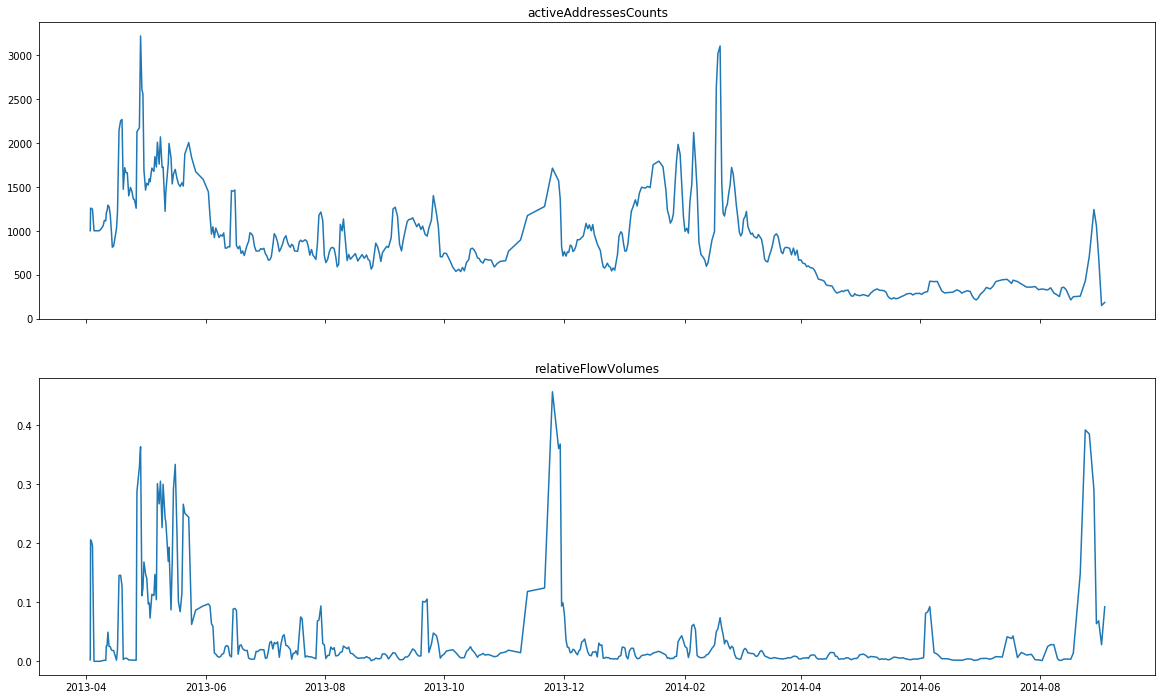

In [96]:
_ = MNC.drawGraph(allMetrics_tag=rolled_tag)

In [64]:
MNC.allMetrics.v[tag_l + 'mean_w2_WOtimes'] = pd.rolling_mean(MNC.allMetrics[tag_l][[S_ADDS_CNTS, S_REL_FLOWS]], window=2, center=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=True).mean()
  """Entry point for launching an IPython kernel.


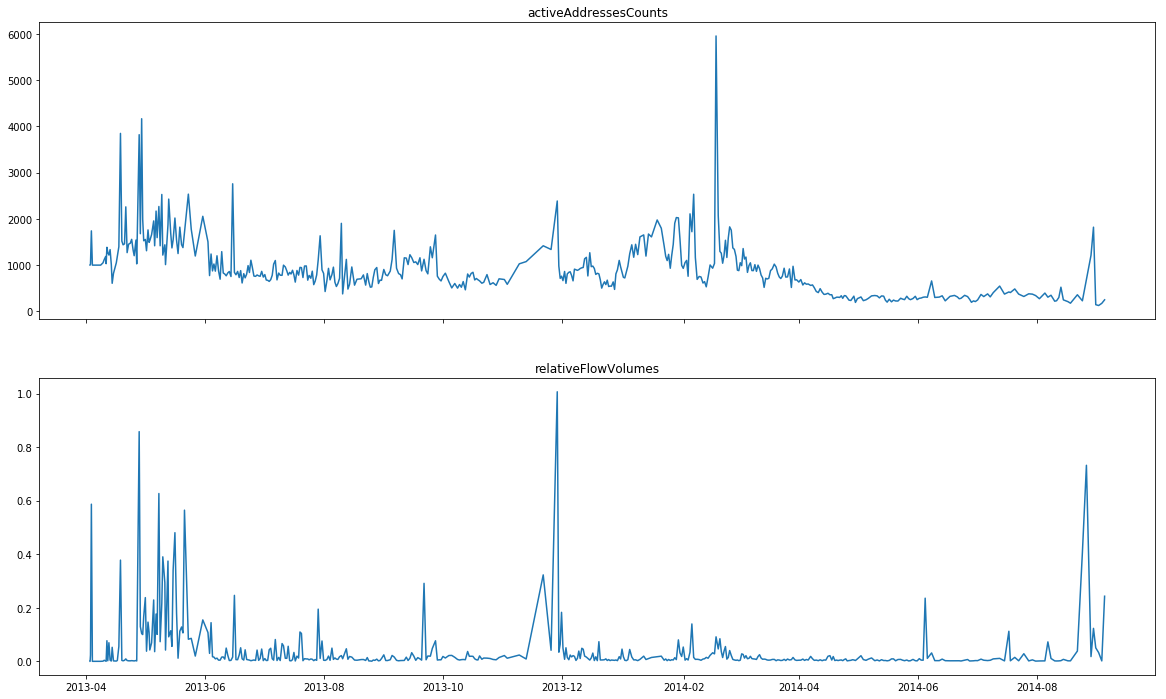

In [60]:
_ = MNC.drawGraph(allMetrics_tag=tag_l)

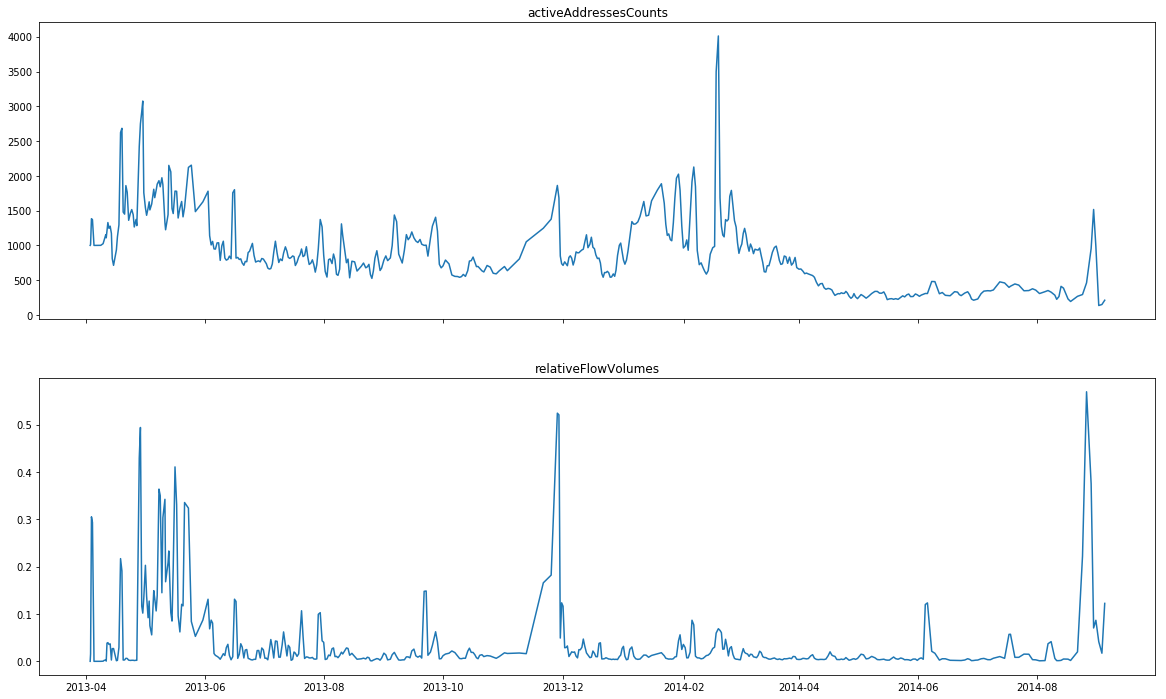

In [65]:
_ = MNC.drawGraph(allMetrics_tag=tag_l + 'mean_w2_WOtimes')

In [32]:
MNC.getRelativeFlowVolumes('nonPar')

Work time 0.0s


In [33]:
MNC[S_REL_FLOWS].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks/int1000b_relativeFlowVolumes_nonPar" file


In [26]:
MNC.getFlowAndIncomeVolume()

Work time 6.99s


In [6]:
# TESTING
MNC.getFlowAndIncomeVolume('nonPar')

Work time 21.57s


In [30]:
MNC.getFlowAndIncomeVolume('nonPar')

Work time 19.59s


In [32]:
MNC[S_FLOWS_INCOMES]['par'] == MNC[S_FLOWS_INCOMES]['nonPar']

True

In [206]:
%time flows_m, incomes_m = getFlowAndIncomeVolume(MNC.blocks, MNC[S_MAP_A2C][''], MNC.group_size)

CPU times: user 19.2 s, sys: 0 ns, total: 19.2 s
Wall time: 19.2 s


In [ ]:
%time relativeFlowVolumes_dedic_m = getRelativeFlowVolumes_dedicated(flows, incomes)

In [166]:
LTC[S_MAP_A2C].read('np')

There is already np version of data, stop


In [14]:
MNC[S_NCS].readAll()
MNC[S_ADDS_CNTS].readAll()
MNC[S_CLS_CNTS].readAll()
MNC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_oldQ.json', key is 'oldQ'
Finish


In [40]:
MNC.d[S_CLS_CNTS].v[''][:10]

[21, 46, 83, 100, 114, 111, 146, 73, 195, 76]

In [15]:
MNC.guessMiners()

Work time 7.3s


In [22]:
kutak = getActiveAddressesCounts(MNC.blocks, MNC.group_size)

In [23]:
kutak == MNC[S_ADDS_CNTS]['']

True

In [405]:
#MNC.showDataAndVersions()

In [406]:
#MNC.gatherAllMetrics({S_NCS: '', S_GINIS: ''})

In [46]:
MNC.getMapAddress2Cluster(key='np')

Work time 11.48s


In [ ]:
dictB[blocksci.address_type.nonstandard]

In [49]:
MNC.getActiveClustersCounts(key='usingNpMap')

Work time 16.65s


In [52]:
MNC[S_CLS_CNTS][''][::30]# == MNC[S_CLS_CNTS]['usingNpMap']

[21, 148, 172, 172, 51, 32, 42, 47, 323, 83, 132, 208, 279, 106, 54, 48, 39]

In [410]:
MNC.getGinis(key='usingNpMap')

90516
Work time 21.72s


In [413]:
MNC[S_GINIS][''] == MNC[S_GINIS]['usingNpMap']

True

In [415]:
MNC.getActiveClustersCounts(key='usingNpMap')

Work time 16.79s


In [417]:
MNC[S_CLS_CNTS].v.keys()

dict_keys(['', 'usingNonSerMap', 'usingNpMap'])

In [ ]:
MNC.getActiveClustersCounts(key='usingNpMap')

In [309]:
#f = MNC.drawGraph(metric_version_dict={S_NCS: '', S_GINIS: ''})

In [308]:
#f = MNC.drawGraph(allMetrics_tag='ginisOfClustersWealth=_NacamotoCoefs=')

In [307]:
#MNC.allMetrics.v['ginisOfClustersWealth=_NacamotoCoefs=']

In [71]:
MNC.map_address2cluster.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_map_add2cl'...
  Got 'int1000b_map_add2cl.hdf5', key is ''
Finish


In [84]:
# Q_LITECOIN
LTC = CoinDataMgr(blocksci_path="/home/ubuntu/litecoin_disk3",
                  path_to_clusters="/home/ubuntu/~/clusters_l2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/litecoin")

Got 1421537 blocks
Got 9312234 clusters


In [106]:
LTC[S_FLOWS_INCOMES].readAll()
LTC.getRelativeFlowVolumes('par')

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_par_WOFee.json', key is 'par_WOFee'
  Got 'int1000b_flowAndIncomeVolumes_par.json', key is 'par'
Finish
Work time 0.0s


In [108]:
LTC[S_REL_FLOWS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_relativeFlowVolumes_par" file


In [109]:
LTC.getFees()

Work time 1.95s


In [110]:
LTC[S_FEES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_fees_par" file


In [101]:
LTC[S_GINIS].readAll()
LTC[S_REL_FLOWS].readAll()
LTC[S_FEES].readAll()
LTC[S_NCS].readAll()
LTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_relativeFlowVolumes'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_fees'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


In [114]:
#LTC.allMetrics[tag_l]

In [115]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'', S_REL_FLOWS:'par', S_FEES:'par', S_UNSPENTS:'par'})
tag_filtered_l = LTC.rollingMeanAllMetrics(allMetrics_tag=tag_l, common_win=5)

Gathered under tag 'ginisOfClustersWealth=_unspents=par_relativeFlowVolumes=par_fees=par_NacamotoCoefs='
There is already ginisOfClustersWealth=_unspents=par_relativeFlowVolumes=par_fees=par_NacamotoCoefs= version of data, stop


/home/ubuntu/thesis_work/my_tools.py:344: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


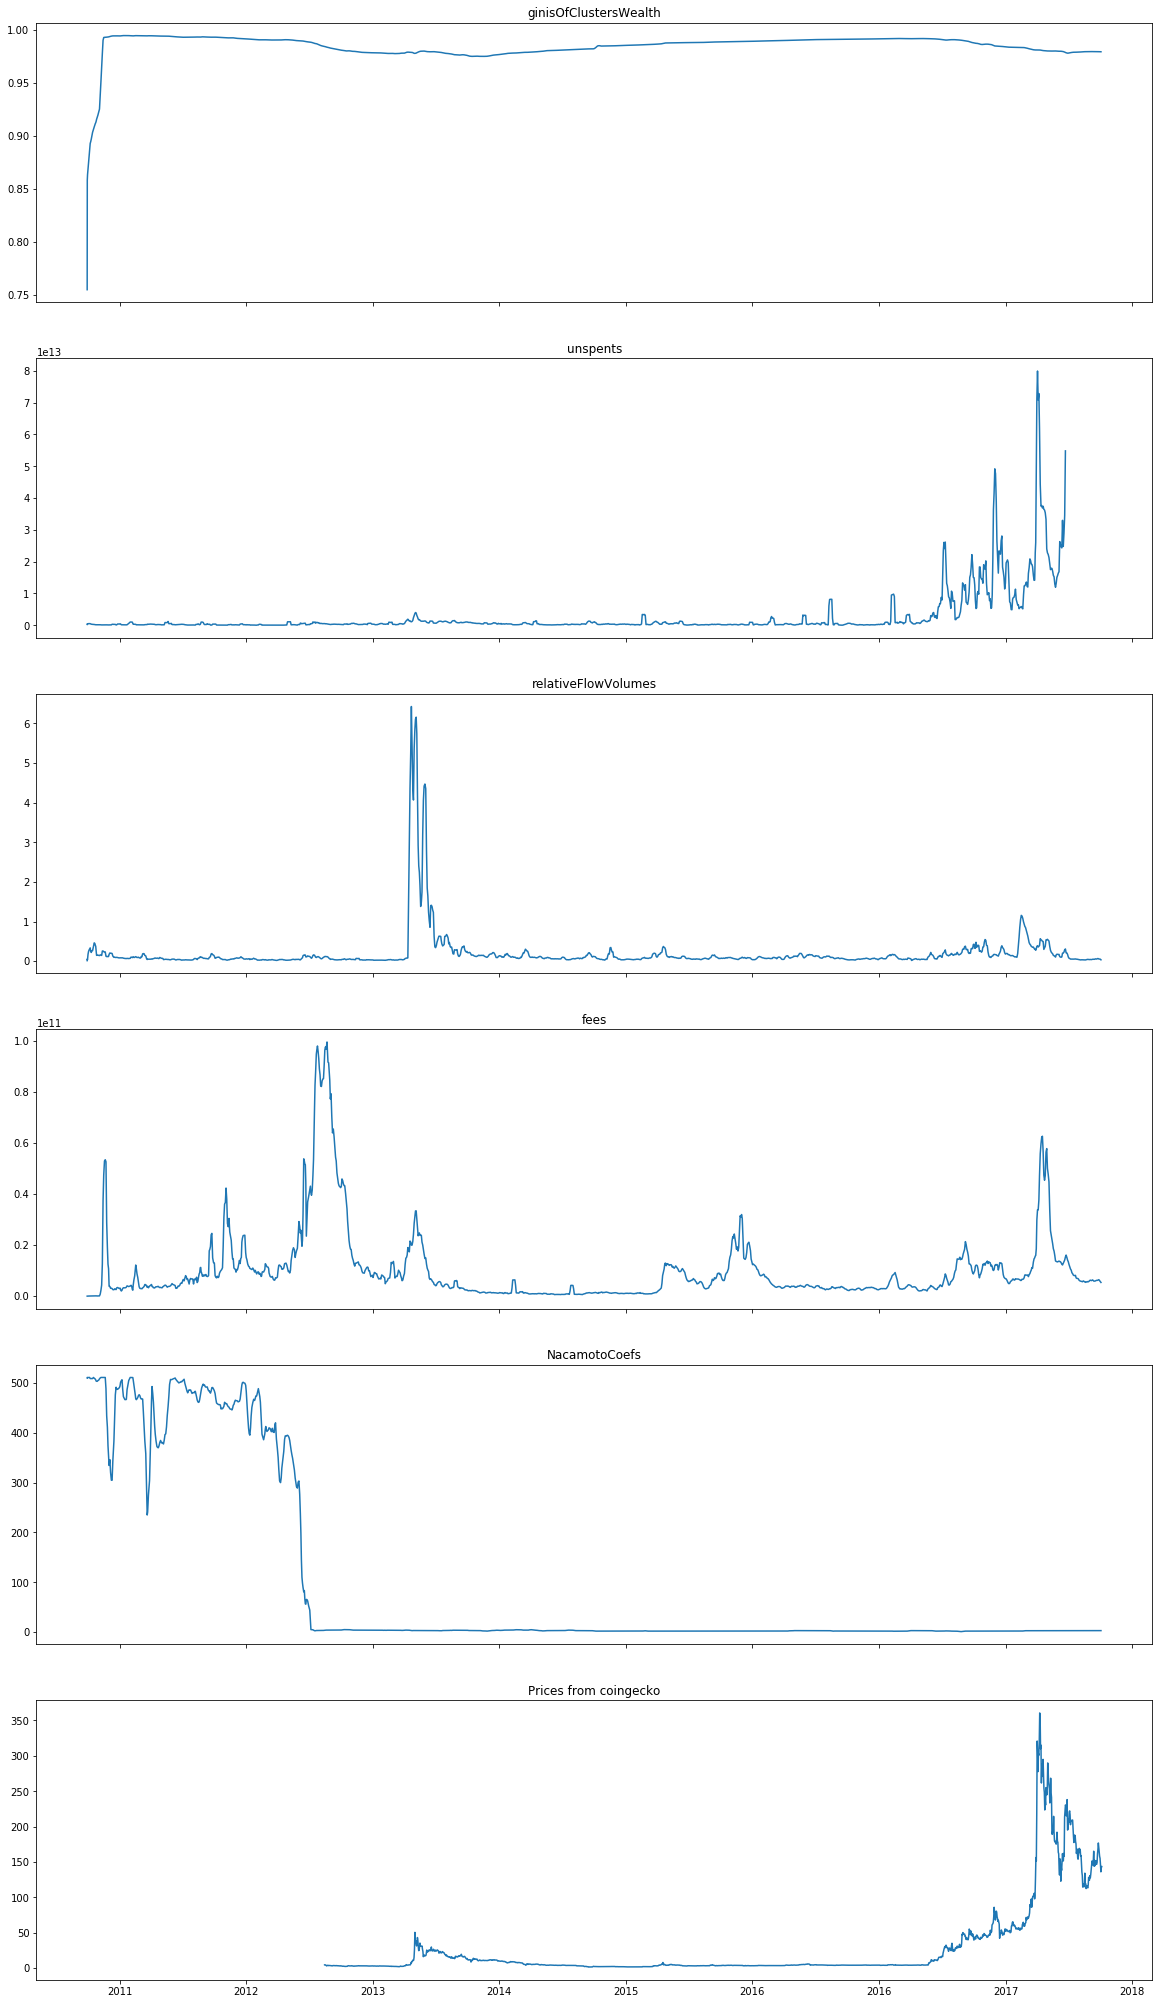

In [116]:
_ = LTC.drawGraph(allMetrics_tag=tag_filtered_l, price_key='coingecko')

In [117]:
_.savefig('litecoin_win5.png')

In [136]:
LTC.blocks[0].time

datetime.datetime(2011, 10, 7, 7, 31, 5)

In [32]:
LTC.getFees()

Work time 20.28s


In [33]:
LTC.getFees(key='nonPar')

Work time 2.05s


In [34]:
LTC[S_FEES]['par'] == LTC[S_FEES]['nonPar']

True

In [35]:
LTC[S_FEES]['par'][::100]

[0,
 4164100001,
 10995638340,
 23895947357,
 12943947286,
 4845863997,
 918544976,
 585096759,
 1220315740,
 8934654377,
 4576278347,
 3269669314,
 8606155703,
 8130656532,
 5514913174]

In [18]:
LTC[S_NCS].readAll()
LTC[S_ADDS_CNTS].readAll()
LTC[S_CLS_CNTS].readAll()
LTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_NacamotoCoefs'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_activeAddressesCounts'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_activeClustersCounts'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
Finish


In [20]:
#LTC_2k.getMapAddress2Cluster(key='np')

In [8]:
LTC[S_MAP_A2C].read('np')

In [18]:
LTC.getActiveClustersCounts('usingNpMap')

Work time 752.54s


In [19]:
LTC[S_CLS_CNTS].save('usingNpMap')

Saving "usingNpMap" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_activeClustersCounts_usingNpMap" file


In [13]:
LTC.getFlowAndIncomeVolume('non')

Work time 305.64s


In [36]:
LTC.getFlowAndIncomeVolume('nonPar')

Work time 1040.02s


In [9]:
# TESTING
LTC.getFlowAndIncomeVolume('nonPar')

Work time 1047.93s


In [10]:
# TESTING
LTC.getFlowAndIncomeVolume('par')

Work time 240.68s


In [11]:
# Testing
LTC[S_FLOWS_INCOMES]['par'] == LTC[S_FLOWS_INCOMES]['nonPar']

True

In [12]:
# Testing
LTC[S_FLOWS_INCOMES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_flowAndIncomeVolumes_par" file


In [37]:
LTC[S_FLOWS_INCOMES]['par'] == LTC[S_FLOWS_INCOMES]['nonPar']

True

In [ ]:
LTC[S_FLOWS_INCOMES]['np_']

In [14]:
LTC[S_FLOWS_INCOMES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_flowAndIncomeVolumes_par" file


In [35]:
LTC[S_FLOWS_INCOMES].read('par')

In [17]:
LTC.getRelativeFlowVolumes()
LTC[S_REL_FLOWS].save('par')

There is already par version of data, stop
Work time 0.0s
Saving "par" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_relativeFlowVolumes_par" file


In [46]:
#LTC.d[S_MAP_A2C].save('np', check=False)

Saving "np" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_map_address2cluster_np" file


In [23]:
LTC.getActiveClustersCounts(key='usingNpMap')

Work time 0.05s


In [62]:
len(LTC[S_CLS_CNTS]['usingNpMap'])

1422

In [128]:
%time flowSum2_l = checkFlowSum2(LTC.blocks)
flowSum2_l

CPU times: user 6min 35s, sys: 836 ms, total: 6min 36s
Wall time: 6min 36s


0

In [180]:
%time balances_native_1m_l = LTC.cl_mgr.clusters().balance(1000000)

CPU times: user 7min 29s, sys: 11.4 s, total: 7min 40s
Wall time: 7min 39s


In [176]:
zero_bals = np.zeros(len(LTC.cl_mgr.clusters()))
%time balances_np2_1m_l, bad_blocks = getClustersBalanceChangeBlocksNp2(LTC.blocks[:1000000], LTC[S_MAP_A2C]['np'], zero_bals)

Et ya2!
CPU times: user 6min 34s, sys: 44 ms, total: 6min 34s
Wall time: 6min 34s


In [190]:
zero_bals = np.zeros(len(LTC.cl_mgr.clusters()))
%time balances_np_1m_l = getClustersBalanceChangeBlocksNp(LTC.blocks[:1000000], LTC[S_MAP_A2C]['np'], zero_bals)

CPU times: user 6min 6s, sys: 44 ms, total: 6min 6s
Wall time: 6min 6s


In [181]:
(balances_native_1m_l == balances_np2_1m_l).all()

False

In [191]:
(balances_np_1m_l == balances_np2_1m_l).all()

False

In [185]:
bal_diff = balances_native_1m_l - balances_np2_1m_l

In [189]:
len(bal_diff[bal_diff != 0])

325522

In [183]:
balances_native_1m_l.sum() - balances_np2_1m_l.sum()

-3754480922219596.0

In [192]:
balances_native_1m_l.sum() - balances_np_1m_l.sum()

-3743930089036942.0

In [193]:
balances_np2_1m_l.sum() - balances_np_1m_l.sum()

10550833182654.0

In [184]:
sum(bad_blocks.values())

361404256767

In [89]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [90]:
BTC.getUnspents()

Work time 259.52s


In [91]:
BTC[S_UNSPENTS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_unspents_par" file


In [97]:
BTC[S_GINIS].readAll()
BTC[S_REL_FLOWS].readAll()
BTC[S_FEES].readAll()
BTC[S_NCS].readAll()
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
There is already need2recalculateWOnulldata version of data, stop
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
There is already WOnuldata version of data, stop
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
There is already nonPar version of data, stop
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_nonPar.json', key is 'nonPar'
There is already nonPar version of data, stop
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading fo

In [98]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'WOnuldata', S_REL_FLOWS:'nonPar', S_FEES:'nonPar', S_UNSPENTS:'par'})
tag_filtered_b = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'ginisOfClustersWealth=WOnuldata_unspents=par_relativeFlowVolumes=nonPar_fees=nonPar_NacamotoCoefs='


In [99]:
tag_filtered_b = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

/home/ubuntu/thesis_work/my_tools.py:344: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


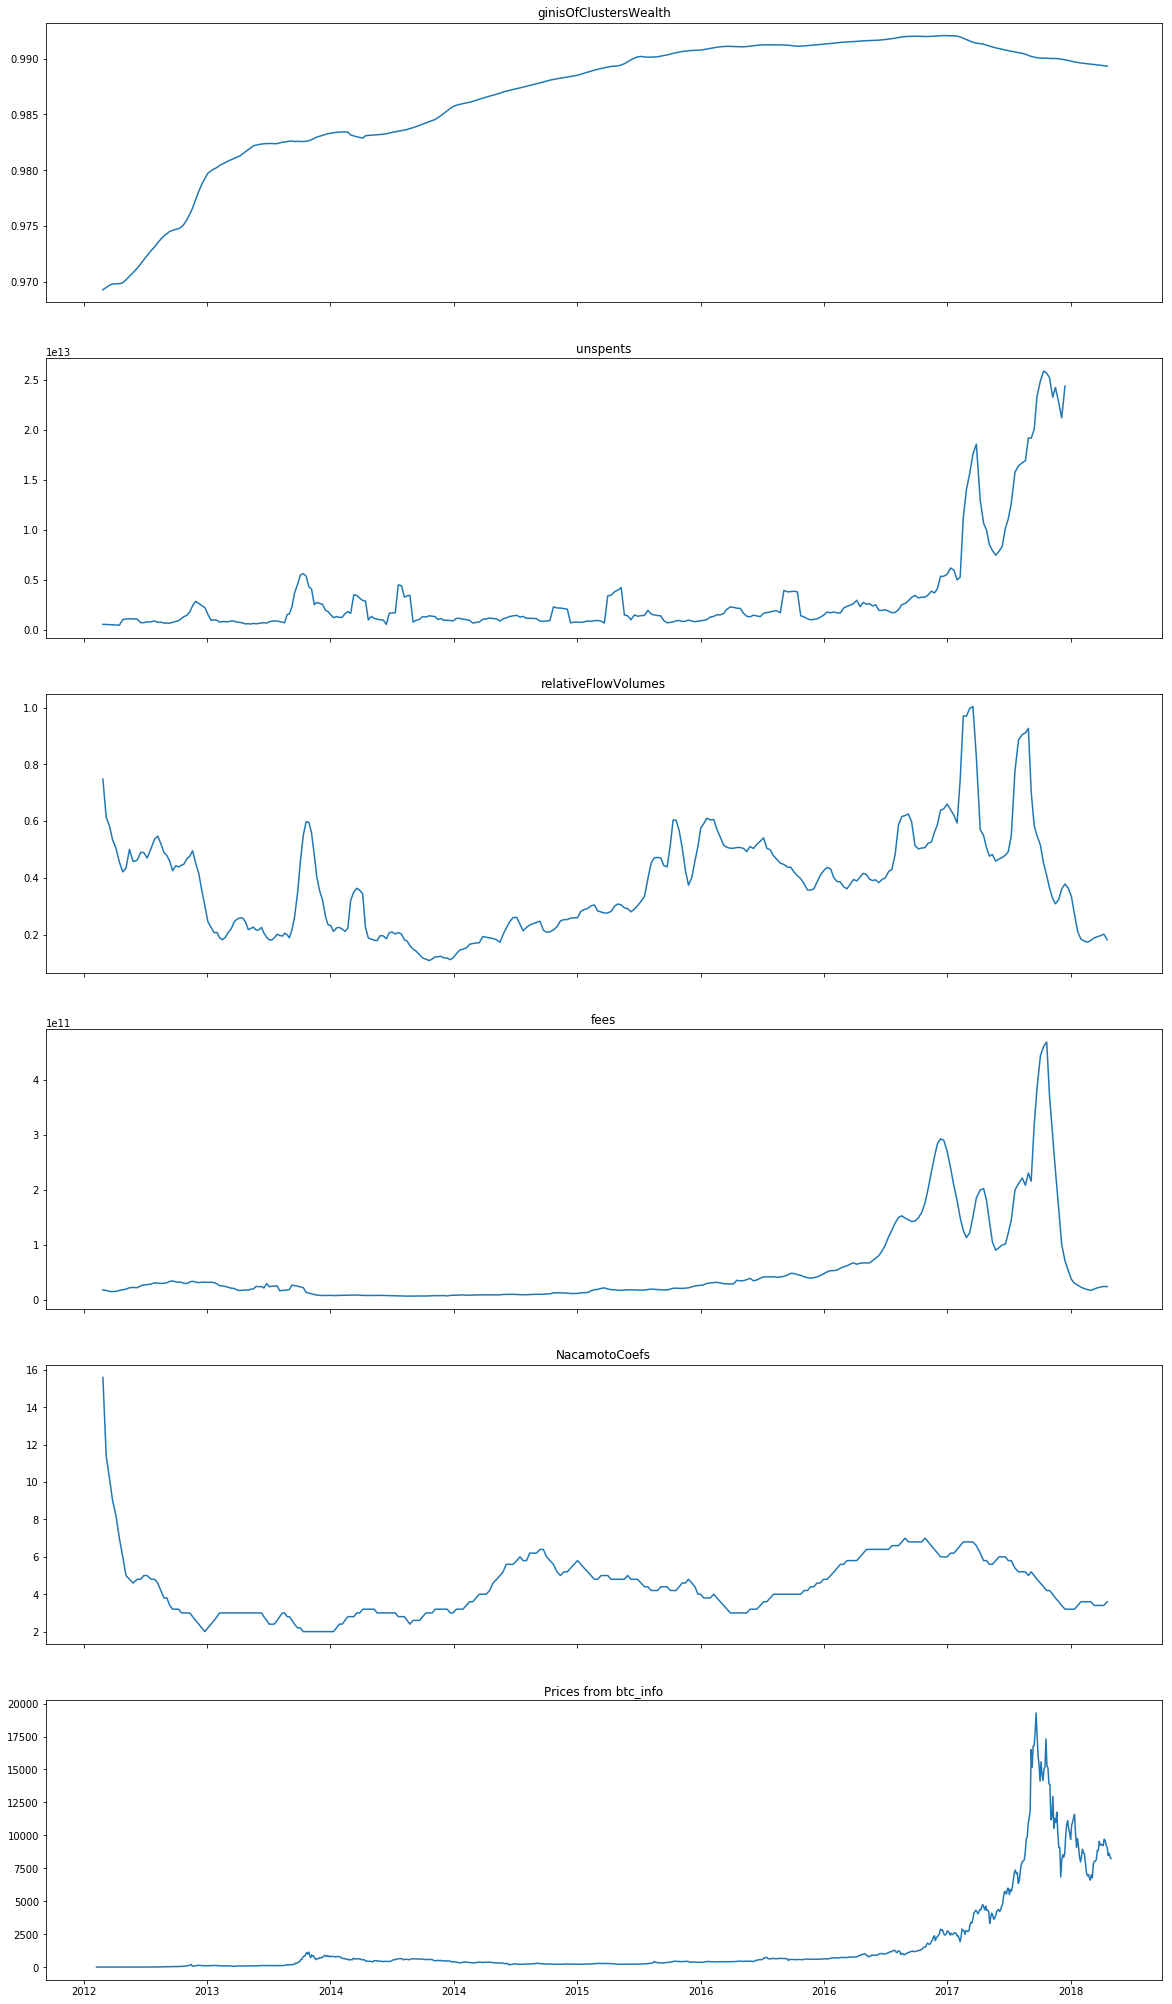

In [118]:
_ = BTC.drawGraph(allMetrics_tag=tag_filtered_b, price_key='btc_info', begin=200)

In [119]:
_.savefig('bitecoin_win5.png')

In [142]:
unspent_np = np.array(BTC[S_UNSPENTS]['par'])
unspent_np[unspent_np == None] = np.nan

In [150]:

unspent_on_flow = unspent_np /  np.array(BTC[S_FLOWS_INCOMES]['nonPar']['incomes'])

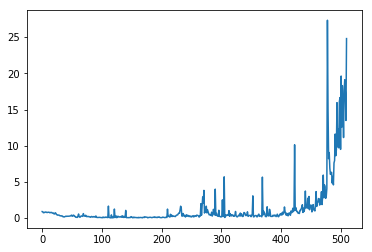

In [151]:
plt.plot(unspent_on_flow)

In [135]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


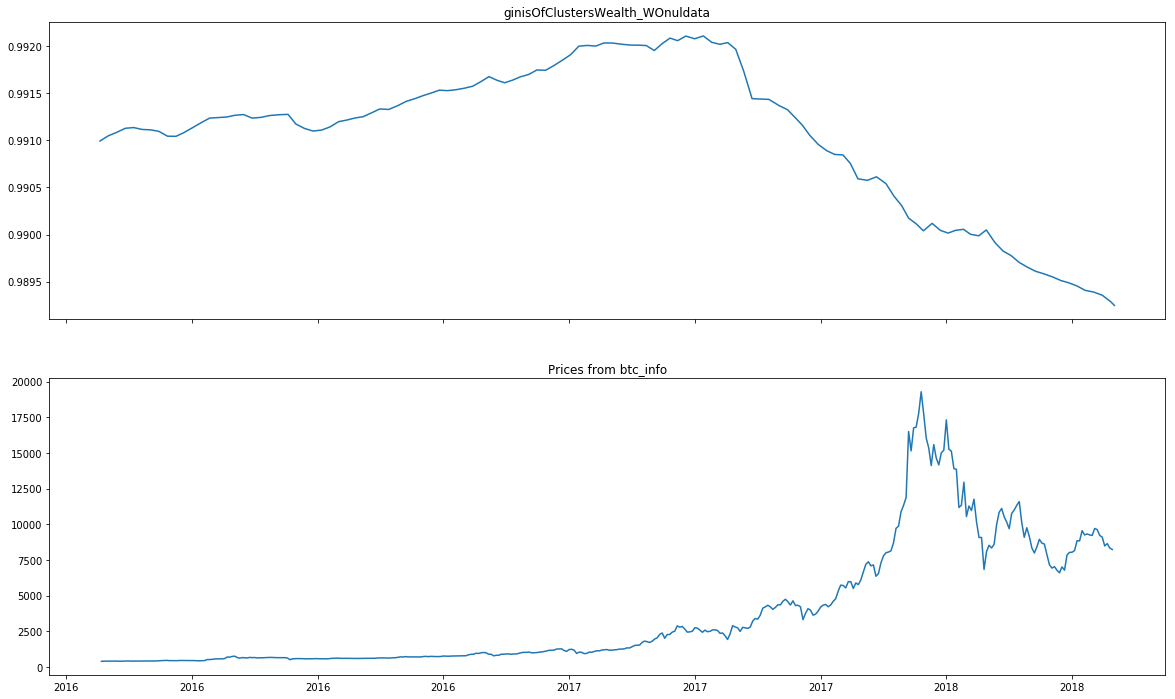

In [122]:
_ = BTC.drawGraph({S_GINIS: 'WOnuldata'}, price_key='btc_info', begin=400)
#_ = BTC.drawGraph({}, price_key='btc_info')

In [120]:
import pandas as pd
prices_b_df = pd.read_csv('~/thesis_work/downloaded/market-price.csv')
#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]
#prices_m_df[:3]

prices_b_df['2009-01-03 00:00:00'][:3]

0    2009-01-05 00:00:00
1    2009-01-07 00:00:00
2    2009-01-09 00:00:00
Name: 2009-01-03 00:00:00, dtype: object

In [121]:

#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]

In [10]:
#prices_b_df_cut = prices_b_df[prices_b_df.]
prices_b_df_cut = prices_b_df[pd.to_datetime(prices_b_df['2009-01-03 00:00:00']) <= BTC.times[-1]]


In [12]:
len(prices_b_df)

1723

In [13]:
prices_b_df_cut[-3:]

,2009-01-03 00:00:00,0.0
1708,2018-05-14 00:00:00,8652.038333
1709,2018-05-16 00:00:00,8340.703333
1710,2018-05-18 00:00:00,8240.055000


In [15]:
prices_b_df_to_save_dict = {'times': pd.to_datetime(prices_b_df_cut['2009-01-03 00:00:00']),
                            'prices': prices_b_df_cut['0.0']}

In [72]:
BTC.prices.add('btc_info', prices_b_df_to_save)

In [74]:
del BTC.prices.v['btc_info']

In [22]:
BTC.prices['btc_info'].columns

Index(['prices', 'times'], dtype='object')

In [73]:
BTC.prices.save('btc_info', check=False)

Saving "btc_info" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_prices_btc_info" file


In [75]:
BTC.prices.read('btc_info')

In [82]:
BTC.prices['btc_info']['times'][:2]# == prices_b_df_to_save['times']

0    2009-01-05
1    2009-01-07
Name: times, dtype: object

In [81]:
prices_b_df_to_save['times'][:2]

0   2009-01-05
1   2009-01-07
Name: times, dtype: datetime64[ns]

In [59]:
saveCSV(prices_b_df_to_save, 'kutakbash.csv')

In [60]:
betek = readCSV('kutakbash.csv')
betek[:2]

,prices,times
0,0.0,2009-01-05
1,0.0,2009-01-07


In [38]:
saveCSV(betek, 'kutakbash2.csv', index=False)

TypeError: saveCSV() got an unexpected keyword argument 'index'

In [51]:
betek.to_csv('kutakbash2.csv', index=False)

In [52]:
betek = readCSV('kutakbash2')
betek[:2]

,Unnamed: 0,prices,times
0,0,0.0,2009-01-05
1,1,0.0,2009-01-07


In [57]:
BTC.getFees('nonPar')

Work time 61.37s


In [58]:
BTC[S_FEES].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_fees_nonPar" file


In [59]:
BTC.getRevenues()

Work time 1.59s


In [61]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


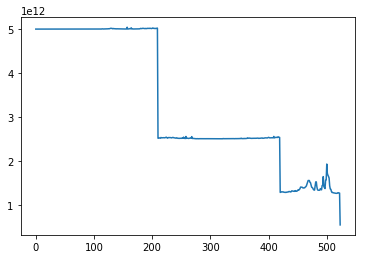

In [63]:
plt.plot(BTC[S_FLOWS_INCOMES]['nonPar_WOFee']['incomes'])

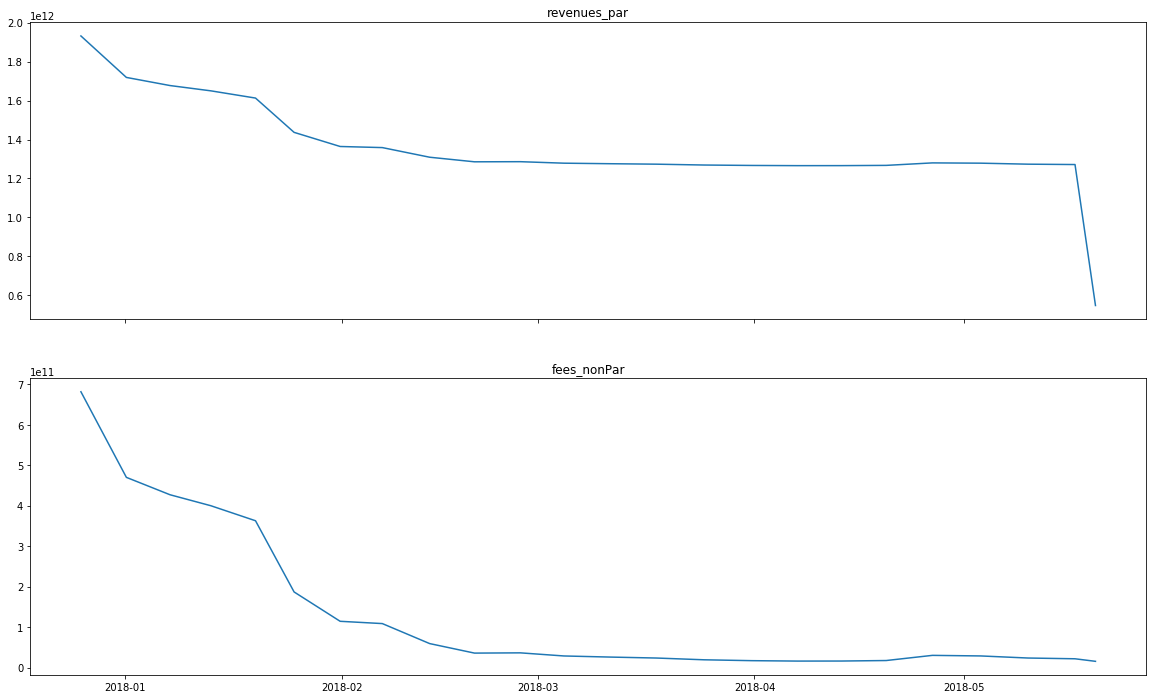

In [67]:
_ = BTC.drawGraph({S_REVENUES:'par', S_FEES:'nonPar'}, begin=500)

In [69]:
%time flowSum_b = checkFlowSum2(BTC.blocks[:500000])

CPU times: user 57min 49s, sys: 0 ns, total: 57min 49s
Wall time: 57min 49s


In [70]:
flowSum_b

0

In [11]:
BTC.chain[200000].fee

63517500

In [12]:
BTC.chain[200000].revenue

5063517500

In [14]:
BTC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [6]:
BTC.getFlowAndIncomeVolume('nonPar')

Work time 11095.46s


In [17]:
# After fix
BTC.getFlowAndIncomeVolume('nonPar')

Work time 9001.3s


In [18]:
BTC[S_FLOWS_INCOMES].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_flowAndIncomeVolumes_nonPar" file


In [22]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
There is already nonPar version of data, stop
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


In [25]:
len(BTC[S_FLOWS_INCOMES]['nonPar']['incomes')# == BTC[S_FLOWS_INCOMES]['nonPar_WOFee']

2

In [20]:
BTC.getRelativeFlowVolumes('nonPar')

Work time 0.0s


In [28]:
BTC[S_REL_FLOWS].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_relativeFlowVolumes_nonPar" file


In [3]:
BTC[S_NCS].readAll()
BTC[S_ADDS_CNTS].readAll()
BTC[S_CLS_CNTS].readAll()
BTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish


In [181]:
# QW_BITCOIN
chain_b = blocksci.Blockchain("/home/ubuntu/bitcoin")
blocks_b = chain_b[:]
INTERVAL_B = 1000
len(chain_b)

523426

In [182]:
cl_mgr_b = blocksci.cluster.ClusterManager("~/clusters_b", chain_b)
#%time cl_mgr_b.create_clustering(location='~/clusters_b', chain=chain_b)
all_clusters_b = cl_mgr_b.clusters()
len(all_clusters_b)

206433637

In [6]:
%time adds_count_b = sum(1 for x in all_addresses_b)

CPU times: user 34min 18s, sys: 56 ms, total: 34min 18s
Wall time: 34min 18s


In [7]:
adds_count_b

1977628451

In [247]:
# SAVE METRICS:
import json
prefix_b = 'calculated/bitcoin/int{}b_'.format(INTERVAL_B)
#with open(prefix_b + 'NC', 'w') as fout:
#    fout.write(json.dumps(NC_b))
#with open(prefix_b + 'adds_counts', 'w') as fout:
#    fout.write(json.dumps(adds_counts_b))
with open(prefix_b + 'cur_clusters', 'w') as fout:
    fout.write(json.dumps(cur_clusters_np_b))
#with open(prefix_b + 'ginis', 'w') as fout:
#    fout.write(json.dumps(ginis_np_b))

In [83]:
allah.columns

Index(['a', 'b', 'c'], dtype='object')

In [72]:
3 // 2

1

In [76]:
1 // 2 

0

In [81]:
def meanDfColumns(pd_df, col_win_dict):
    result_df_dict = {}
    max_window = max(col_win_dict.values())
    first_pos = max_window // 2
    result_len = pd_df.shape[0] - max_window + 1
    for col in col_win_dict:
        window = col_win_dict[col]
        if window > 1:
            col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)
        else:
            col_after_rolling = pd_df[col]
        result_df_dict[col] = col_after_rolling[first_pos: first_pos + result_len]
    return pd.DataFrame(result_df_dict)

In [82]:
meanDfColumns(allah, {'a':1, 'b':3, 'c':2})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=True).mean()
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=True).mean()
  if __name__ == '__main__':


,a,b,c
1,3,3.000000,2.0
2,5,5.666667,4.0


In [46]:
allah = pd.DataFrame({'a': [1, 3, 5, 9], 'b': [1, 3, 5, 9], 'c': [1, 3, 5, 9]})

In [71]:
allah.shape

(4, 3)

In [70]:
pd.rolling_mean(allah[['a', 'b']], window=1, center=True).values

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=True).mean()
  """Entry point for launching an IPython kernel.


array([[ 1.,  1.],
       [ 3.,  3.],
       [ 5.,  5.],
       [ 9.,  9.]])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=True).mean()
  """Entry point for launching an IPython kernel.


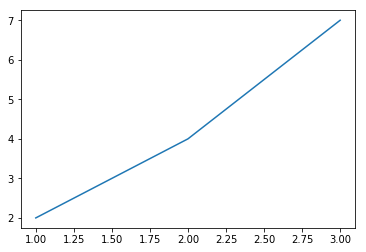

In [51]:
plt.plot(pd.rolling_mean(allah[['a', 'b']], window=2, center=True)['a'])

In [9]:
def foo():
    f = plt.figure(figsize=(20, 3))
    axes = f.subplots(2, 1, sharex=True)
    axes[0].plot([1, 4, 3])
    axes[0].set_title("Nakamoto coefficient")
    axes[1].plot([5, 3, 1])
    axes[1].set_title("Active addresses count")
    return f

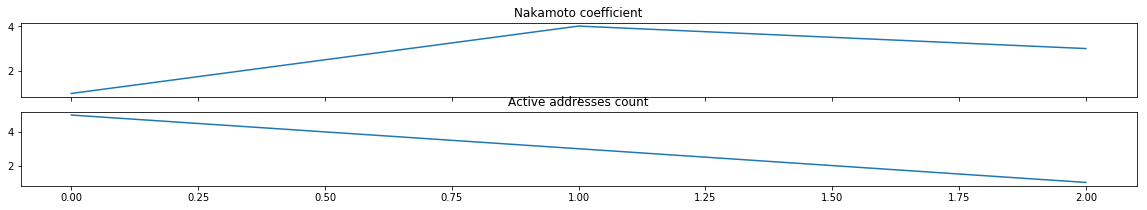

In [10]:
f = foo()
a = 4

In [176]:
f.savefig("dfsdlv.png")

In [108]:
%time balance_np_0_m = getClustersBalanceChangeBlocksNp(blocks_m[:100000], the_map_new_np_m, np.zeros(len(all_clusters_m)))

CPU times: user 3.93 s, sys: 0 ns, total: 3.93 s
Wall time: 3.93 s


In [109]:
%time balance_0_m = getClustersBalanceChangeBlocks(blocks_m[:100000], the_map_new_m, np.zeros(len(all_clusters_m)))

CPU times: user 3.85 s, sys: 0 ns, total: 3.85 s
Wall time: 3.85 s


In [104]:
(balance_0_m == balance_np_0_m).all()

True

In [179]:
import pandas as pd
prices_l_df = pd.read_csv('~/thesis_work/downloaded/ltc-usd-max.csv')
#prices_half_l_df = prices_l_df[pd.to_datetime(prices_l_df['snapped_at']) <= times_l[-1]]
#prices_l_df[:3]

In [33]:
def cube(x):
    return x**3

pool = mp.Pool(processes=4)
results = [pool.apply_async(cube, args=(x,)) for x in range(1,7)]
output = [p.get() for p in results]
print(output)

[1, 8, 27, 64, 125, 216]


Process ForkPoolWorker-690:
Process ForkPoolWorker-691:
Process ForkPoolWorker-692:
Process ForkPoolWorker-689:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/l

In [79]:
cl_balances_native_m = []
for i in range(20):
    cl_balances_native_m.append(sum(MNC.cl_mgr.clusters().balance(i * 1000)))

for i in range(19):
    print(cl_balances_native_m[i + 1] - cl_balances_native_m[i])

50000000000000
27560000000000
9395000000000
4999740000000
1731200000000
200000000000
200000000000
200000000000
200000000000
199999999999
200000000001
200000000000
199999999999
199999999995
199999999997
199999999998
199999999986
199999999997
199999999997


In [ ]:
# TESTING
MNC.getFlowAndIncomeVolume()

!!!TEST MODE!!!!
Fuck! 68255 200000000 220000000
Fuck! 68256 200000000 220000000
Fuck! 68259 200000001 200000000
Fuck! 68261 200000010 360000000
Fuck! 68263 199999999 229999999
Fuck! 68264 199999999 210000000
Fuck! 68269 200000001 220000000
Fuck! 68273 199999999 220000000
Fuck! 68276 200000000 240000000
Fuck! 68278 200000000 210100000
Fuck! 68280 200000000 220000000
Fuck! 68287 200000000 220000000
Fuck! 68290 200000001 210000000
Fuck! 68292 199999999 200000000
Fuck! 68293 200000000 210000000
Fuck! 68295 200000001 220000000
Fuck! 68297 200000000 210000000
Fuck! 68299 200000000 210000000
Fuck! 68304 199999998 210000000
Fuck! 68306 200000000 220000000
Fuck! 68307 200000000 210000000
Fuck! 68309 199999999 220000000
Fuck! 68311 200000001 210000000
Fuck! 68314 199999999 220633064
Fuck! 68315 200000000 210000000
Fuck! 68318 199999999 270000000
Fuck! 68319 200000000 200100000
Fuck! 68320 199999999 200199999
Fuck! 68321 200000000 240099999
Fuck! 68322 200000000 210100000
Fuck! 68323 199999999 2

Fuck! 68982 199999999 229999999
Fuck! 133714 200000000 210000000
Fuck! 68985 200000000 210000000
Fuck! 197219 200000001 210000000
Fuck! 133723 199999999 240000000
Fuck! 197224 199999998 260000000
Fuck! 68987 200000000 210000000
Fuck! 197227 199999995 290000000
Fuck! 133734 200000000 220000000
Fuck! 68996 200000000 210000000
Fuck! 197229 199999999 220000000
Fuck! 133735 199999999 200000000
Fuck! 69003 200000001 210000000
Fuck! 133737 199999999 220000000
Fuck! 69005 200000000 210000000
Fuck! 197230 200000000 210000000
Fuck! 255839 200000000 210000000
Fuck! 133749 199999999 200000000
Fuck! 69019 200000000 210000000
Fuck! 197232 199999999 220000000
Fuck! 69027 200000000 210000000
Fuck! 133751 200000000 220000000
Fuck! 255841 200000000 210000000
Fuck! 197233 200000001 220000000
Fuck! 133752 200000002 210000000
Fuck! 69031 200000000 210000000
Fuck! 197234 200000000 220000000
Fuck! 133753 199999999 200000000
Fuck! 255847 200000000 220000000
Fuck! 69035 199999999 200000000
Fuck! 197236 2000000

Fuck! 365233 200000000 220000000
Fuck! 256138 199999999 210000000
Fuck! 197671 199999995 670000000
Fuck! 69281 200000000 210000000
Fuck! 256159 200000000 210000000
Fuck! 197679 200000000 250000000
Fuck! 365236 200000000 210000000
Fuck! 310975 199999998 220000000
Fuck! 133976 200000000 210000000
Fuck! 69282 200000001 220000000
Fuck! 365237 200000000 210000000
Fuck! 133991 200000000 210000000
Fuck! 256185 200000000 210000000
Fuck! 69289 200000000 229999999
Fuck! 310976 200000000 210000000
Fuck! 134006 200000000 220000000
Fuck! 365241 199999997 229999999
Fuck! 197682 199999999 220000000
Fuck! 69291 200000000 210000000
Fuck! 256190 199999999 200000000
Fuck! 365244 199999999 200000000
Fuck! 310978 199999999 200000000
Fuck! 256208 199999997 210000000
Fuck! 134039 199999999 229999999
Fuck! 256211 200000000 210000000
Fuck! 134040 199999999 220000000
Fuck! 365253 199999999 220000000
Fuck! 256213 200000000 220000000
Fuck! 365254 200000000 210000000
Fuck! 310979 199999998 229999999
Fuck! 134043 2

Fuck! 197879 200000000 220000000
Fuck! 69374 200000000 210000000
Fuck! 365403 200000000 210000000
Fuck! 311151 200000002 220000000
Fuck! 197887 200000000 210000000
Fuck! 430362 200000001 320000000
Fuck! 365406 200000000 210000000
Fuck! 69375 199999999 229999999
Fuck! 256479 200000000 220000000
Fuck! 430366 200000000 210000000
Fuck! 365411 200000000 210000000
Fuck! 256481 200000000 210000000
Fuck! 430369 199999999 210000000
Fuck! 311154 200000000 210000000
Fuck! 197951 200000000 210000000
Fuck! 365413 200000000 210000000
Fuck! 69377 200000001 202000000
Fuck! 311159 200000000 210000000
Fuck! 430377 200000000 210000000
Fuck! 256487 199999999 220000000
Fuck! 197973 200000001 210000000
Fuck! 134233 200000000 220000000
Fuck! 365430 200000000 210000000
Fuck! 430380 200000000 210000000
Fuck! 69388 199999999 200999999
Fuck! 256491 200000000 210000000
Fuck! 365440 200000000 210000000
Fuck! 311168 200000000 210000000
Fuck! 69389 199999999 200000000
Fuck! 197984 199999996 440000000
Fuck! 311169 20

Fuck! 256672 199999998 209999998
Fuck! 365606 200000000 210000000
Fuck! 134470 199999997 300000000
Fuck! 198213 199999999 229999999
Fuck! 365607 200000000 210000000
Fuck! 256675 199999999 200000000
Fuck! 311305 200000002 210000000
Fuck! 430786 200000000 210000000
Fuck! 134473 200000003 370000000
Fuck! 69487 199999999 200000000
Fuck! 198214 200000000 250000000
Fuck! 311315 199999999 220000000
Fuck! 256701 199999999 210000000
Fuck! 134474 200000001 200000000
Fuck! 198216 200000004 210000000
Fuck! 69491 200000000 350000000
Fuck! 430806 200000000 210000000
Fuck! 198218 200000000 210000000
Fuck! 311316 199999999 220000000
Fuck! 134477 199999999 220000000
Fuck! 69493 200000000 210000000
Fuck! 256704 200000000 210000000
Fuck! 365613 200000000 210000000
Fuck! 198220 200000000 220000000
Fuck! 311318 200000000 229999999
Fuck! 134482 199999998 229999999
Fuck! 311320 199999998 229999999
Fuck! 365616 200000000 229999999
Fuck! 198223 200000000 210000000
Fuck! 134485 200000000 210000000
Fuck! 311323 

Fuck! 431176 200000000 210000000
Fuck! 365803 200000000 210000000
Fuck! 134679 200000000 210000000
Fuck! 311453 200000007 220000000
Fuck! 69589 199999999 200000000
Fuck! 257009 200000000 220000000
Fuck! 431178 199999999 210000000
Fuck! 198546 200000069 1100000000
Fuck! 257011 200000000 210000000
Fuck! 311456 200000001 210000000
Fuck! 134693 200000000 210000000
Fuck! 365804 200000000 220000000
Fuck! 198547 200000003 200000000
Fuck! 311457 200000003 220000000
Fuck! 431184 200000000 210000000
Fuck! 69591 200000000 210000000
Fuck! 365805 200000000 210000000
Fuck! 134702 200000000 210000000
Fuck! 365806 200000000 210020000
Fuck! 198552 200000000 210000000
Fuck! 431188 200000001 210000000
Fuck! 311460 200000000 210000000
Fuck! 365812 200000001 210000000
Fuck! 431189 200000000 210000000
Fuck! 198556 199999999 210000000
Fuck! 69592 200000013 330000000
Fuck! 257013 200000000 210000000
Fuck! 365819 200000001 200000000
Fuck! 311467 200000000 210000000
Fuck! 134713 199999999 210000000
Fuck! 257014

Fuck! 198823 200000000 220000000
Fuck! 69696 200000000 210000000
Fuck! 134985 200000000 220000000
Fuck! 257341 200000000 210000000
Fuck! 365928 200000000 210000000
Fuck! 198826 200000000 210000000
Fuck! 431504 200000000 210000000
Fuck! 69704 199999999 210000000
Fuck! 198827 200000000 210000000
Fuck! 365934 200000000 210000000
Fuck! 257343 200000000 210000000
Fuck! 134991 200000000 210000000
Fuck! 311582 200000003 209000000
Fuck! 198836 200000000 220000000
Fuck! 365941 200000001 200000000
Fuck! 69706 199999999 210000000
Fuck! 431514 200000000 210000000
Fuck! 311584 200000000 210000000
Fuck! 198839 200000000 210000000
Fuck! 365950 200000000 210000000
Fuck! 69709 200000001 210000000
Fuck! 311586 199999999 210000000
Fuck! 198841 200000000 210000000
Fuck! 365959 199999999 200000000
Fuck! 135038 200000000 210000000
Fuck! 431515 200000000 210000000
Fuck! 257360 199999999 200138933
Fuck! 365966 200000000 210000000
Fuck! 69711 200000000 220000000
Fuck! 311587 199999998 220000000
Fuck! 365974 20

Fuck! 135312 199999999 200000000
Fuck! 257593 200000000 210000000
Fuck! 199205 200000000 210000000
Fuck! 69833 200000000 220000000
Fuck! 431892 199999999 210000000
Fuck! 311685 199999999 240000000
Fuck! 69835 199999999 200999999
Fuck! 257596 200000000 220000000
Fuck! 366131 200000000 270000000
Fuck! 69838 200000001 240000000
Fuck! 257597 200000000 210000000
Fuck! 311687 199999998 229999999
Fuck! 431913 200000000 210000000
Fuck! 199230 200000000 210000000
Fuck! 366134 200000000 210000000
Fuck! 135349 199999999 220000000
Fuck! 257599 200000000 220000000
Fuck! 366135 200000000 210000000
Fuck! 311693 199999999 229999999
Fuck! 199238 200000000 220000000
Fuck! 257607 200000000 220000000
Fuck! 311699 200000001 240000000
Fuck! 69842 199999999 200999999
Fuck! 366137 200000000 210000000
Fuck! 431942 200000000 210000000
Fuck! 257612 200000000 210000000
Fuck! 311700 199999998 210000000
Fuck! 431948 200000000 210000000
Fuck! 69861 200000000 210000000
Fuck! 311702 200000000 210000000
Fuck! 199287 20

In [207]:
collections.Counter(incomes_m)

Counter({199299999938: 1,
         200000000000: 6,
         200010000000: 2,
         200052999997: 1,
         200089999999: 1,
         200160709554: 1,
         200180999999: 1,
         200210043169: 1,
         200260000000: 1,
         200341999996: 1,
         200420227315: 1,
         200432299999: 1,
         200510000000: 1,
         200548299998: 1,
         200549999997: 1,
         200558323234: 1,
         200563299999: 1,
         200570389759: 1,
         200590100000: 1,
         200610000000: 1,
         200690999996: 1,
         200722999986: 1,
         200729999968: 1,
         200730000000: 1,
         200739999998: 1,
         200742032356: 1,
         200750099997: 1,
         200770100000: 1,
         200780999998: 1,
         200820096977: 1,
         200826382056: 1,
         200829999999: 1,
         200860199997: 1,
         200869999998: 1,
         200870099999: 1,
         200880025104: 1,
         200889999999: 1,
         200890368710: 1,
         200

In [20]:
# Fail of Blockchaim.map_blocks
BTC.getFlowAndIncomeVolume()

error: 'i' format requires -2147483648 <= number <= 2147483647

In [166]:
# Check if multiouts' addresses belong to same cluster (SPOILER: NO!)
multiCOs = []
for b in LTC.blocks:
    outs = b.coinbase_tx.outputs
    if len(outs) > 1:
        multiCOs = list(outs)
        break
#list(LTC.blocks[106].coinbase_tx.outputs)

for CO in multiCOs:
    add = CO.address
    print(LTC[S_MAP_A2C]['np'][add.type][add.address_num])

18089
19075
17183
20239
20240
16957


In [164]:
multiCOs

[TxOut(spending_tx_index=477524, address=PubkeyHashAddress(LKU2QJFTZJ2eVb8UBdbXePn57cHDzJoZwt), value=725176292),
 TxOut(spending_tx_index=66361, address=PubkeyHashAddress(LXQSjwYzLtiJV6xvc7bPHNAwp8HTmtBJeD), value=745734844),
 TxOut(spending_tx_index=141868, address=PubkeyHashAddress(LdnKnkKmrXoFGsvbcJpFF19jbqo7iZtFLe), value=1423578960),
 TxOut(spending_tx_index=169761, address=PubkeyHashAddress(Lfn4zsw87arhBpd5S7fJzx8pZS8xGvAj7Z), value=894072318),
 TxOut(spending_tx_index=585777, address=PubkeyHashAddress(LiFSXnBuLUD1mMKDn1uvFxCLZq3tZt3SoK), value=183845918),
 TxOut(spending_tx_index=176939, address=PubkeyHashAddress(LYhRGZyYaoMwE6FKfsHYtKkWMqrahBKow8), value=1027691668)]